In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline

/home/hristo/mlenv3/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/hristo/mlenv3/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/hristo/mlenv3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%ls data/

coin__ids.csv  datathon.csv  price_data.csv


In [3]:
coin_ids = pd.read_csv('data/coin__ids.csv')

In [4]:
# price_data = pd.read_csv('data/price_data.csv')

In [5]:
# full_data = pd.read_csv('data/datathon.csv')

In [4]:
coin_ids = {
    'Bitcoin': 1442,
    'Bitcoin Cash': 1445,
    'Bitcoin Gold': 1456,
    'Cardano': 1446,
    'Dash': 1453,
    'Dogecoin': 1447,
    'Eos': 1452,
    'Ethereum': 1443,
    'Ethereum Classic': 1457,
    'Iota': 1451,
    'Lisk': 1460,
    'Litecoin': 1448,
    'Monero': 1454,
    'NEMcoin': 1447,
    'Neo': 1449,
    'Ripple': 1444,
    'Stellar': 1450,
    'Tether': 1474,
    'Tron': 1455,
    'Zcash': 1465,
}

id_coins = {v: k for k, v in coin_ids.items()}

In [20]:
iterator_full_data = pd.read_csv('data/datathon.csv', iterator=True, chunksize=100000, parse_dates = ['time'])
subset_full_data = pd.concat([chunk[chunk.refID_coin.isin(coin_ids.values())] for chunk in iterator_full_data])

In [21]:
subset_full_data = subset_full_data.replace({'refID_coin': id_coins})

In [29]:
daily = subset_full_data[(subset_full_data.time.dt.minute == 0) & (subset_full_data.time.dt.hour == 12)]

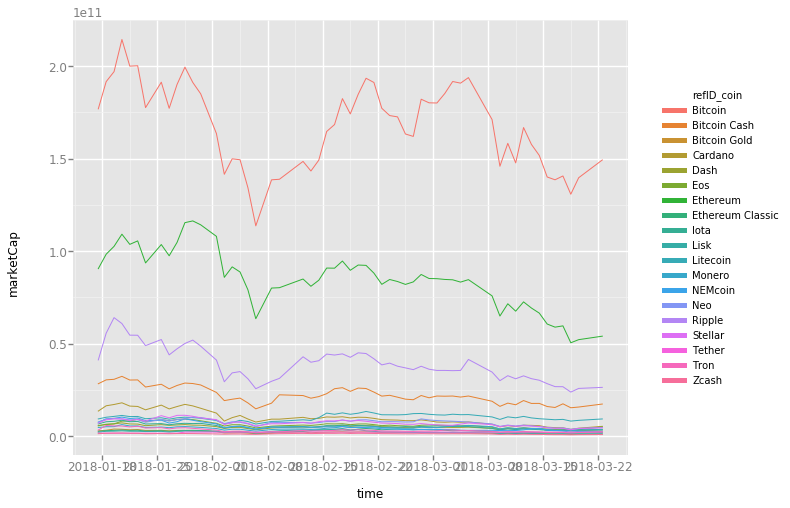

<ggplot: (-9223363305339308400)>

In [31]:
ggplot(aes(x = 'time', y = 'marketCap', color='refID_coin'), data = daily) +\
    geom_line()
#     facet_wrap('refID_coin')

In [13]:
aes?